<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/SoftwareDesign202010_01/SoftwareDesign202010_0102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SoftwareDesign 2020年10月号第一特集 Pythonではじめる統計学

公式のサンプルコードの写経

## 第2章 平均から始める記述統計

In [1]:
# 基本ライブラリ
import pandas as pd
import numpy as np
import numpy.random as rd
import scipy.stats as st
from tqdm import tqdm
from IPython.display import display

# グラフ描画系
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns

# plot setting
plt.rcParams["patch.force_edgecolor"] = True
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle':'--'})


In [2]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.3MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=621d55b7bacfb992f2ffbbc17650f797ad7df4825383a940097c3112f3ecfe31
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [3]:
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [4]:
np.random.seed(71)
n_data = 1000
height_men = np.random.normal(loc=171.4, scale=5.8, size=n_data)
height_women = np.random.normal(loc=157.5, scale=5.4, size=n_data)

* 図1 身長データのヒストグラム

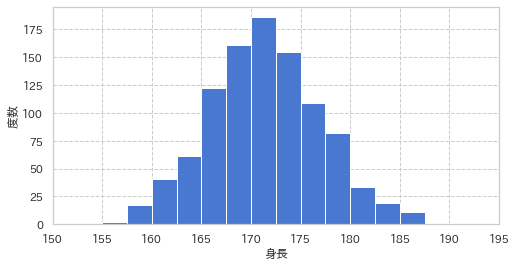

In [5]:
# コード1: pythonでヒストグラム描画
plt.figure(figsize=(8,4))
plt.hist(height_men, bins=np.arange(150, 195, 2.5),)
plt.xlim(150, 195)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()

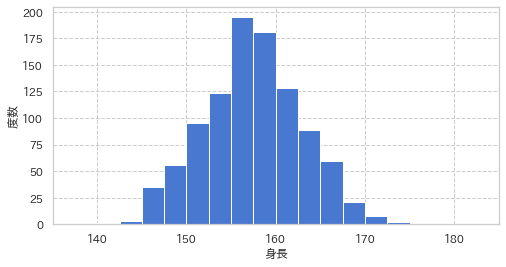

In [6]:
plt.figure(figsize=(8,4))
plt.hist(height_women, bins=np.arange(135, 185, 2.5),)
plt.xlim(135, 185)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()

* 図2 2つのデータセットのヒストグラム

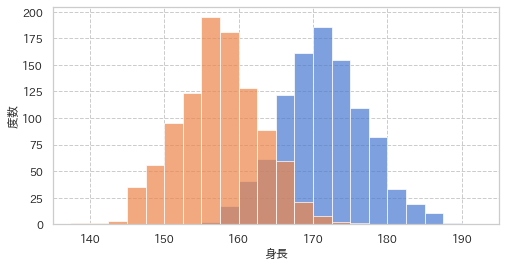

In [7]:
# コード2: pythonでヒストグラム描画
plt.figure(figsize=(8,4))
plt.hist(height_men, bins=np.arange(140, 200, 2.5), alpha=0.7, label="男性")
plt.hist(height_women, bins=np.arange(135, 180, 2.5), alpha=0.7, label="女性")
plt.xlim(135, 195)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()

* 図３ 総和記号への書き換え

1000人分の合計
$$
\begin{align}
 &= x_1 + x_2 + x_3 + \dotsc + x_{999} + x_{1000} \\
 &= \sum_{i=1}^{1000} x_i
 \end{align}
$$




In [8]:
# コード3: 総和記号がやっていることをpythonコードで表す
height_sum = 0
for i in range(len(height_men)):
  height_sum += height_men[i]
print(height_sum)

171409.2829305438


In [9]:
# exp関数
print(np.e)

2.718281828459045


### exp関数

* 図５ exp関数の描画コードおよびグラフ

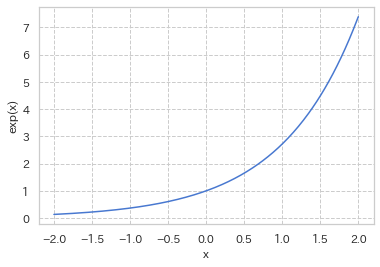

In [10]:
# コード4: exp(x)のグラフ描画
x = np.linspace(-2, 2, 301)
plt.plot(x, np.exp(x))
plt.ylabel("exp(x)")
plt.xlabel("x")
plt.show()

### 平均

$ 
\begin{align}
  \bar{x}
  &= \frac{x_1 + x_2 + \dotsc + x_n}{n} \\
  &= \frac{1}{n} \sum_{i=1}^{n} x_i 
\end{align}
$

In [11]:
# コード5: 平均の計算のpython コード
sum_val = 0
n = len(x)
for i in range(n):
  sum_val += x[i]
mean_val = sum_val / n
print(mean_val)

1.0327656043024712e-17


### 平均値の特性

In [12]:
def plot_mean(x, xlim):
  m = np.mean(x)
  plt.figure(figsize=(13,2))
  plt.scatter(x, np.zeros_like(x), s=50, zorder=100)
  plt.scatter(m, [0], s=100, c="r", zorder=100)

  for i in range((len(x))):
    plt.text(x[i], -0.3, f"x{i+1}", size=12)
    plt.text(x[i], -0.5, f"={x[i]}", size=12)
  
  plt.text(m, -0.3, "average", size=12)
  plt.text(m, -0.6, f"={m:.1f}", size=12)
  plt.plot([0,100], [0,0], c="K", zorder=10)

  plt.yticks([])
  plt.xlim(xlim)
  plt.ylim(-1,1)
  plt.xlabel("test score")
  plt.show()

* 図６ 平均値の特性

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


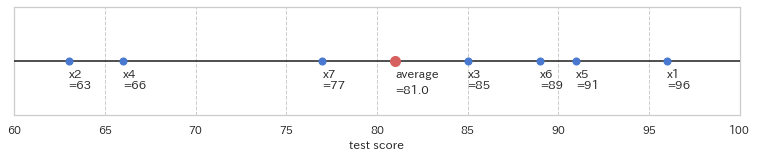

In [13]:
x = [96, 63, 85, 66, 91, 89, 77]
plot_mean(x, xlim=(60, 100))

### 中央値

* 図７ 平均値の位置（外れ値がある場合）

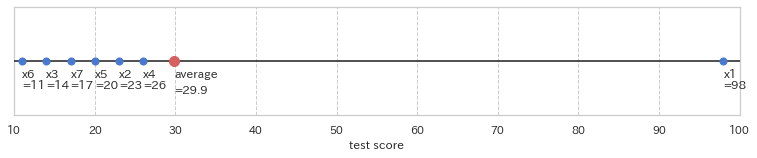

In [14]:
x = [98, 23, 14, 26, 20, 11, 17, ]
plot_mean(x, xlim=(10, 100))

* 図８ 中央値の位置

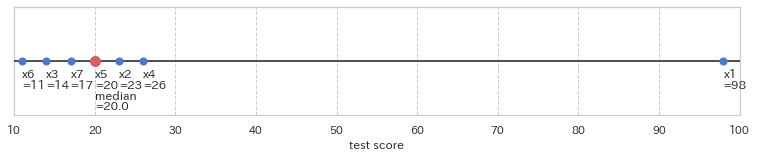

In [15]:
x = [98, 23, 14, 26, 20, 11, 17, ]
xlim = (10, 100)

m = np.median(x)
plt.figure(figsize=(13,2))
plt.scatter(x, np.zeros_like(x), s=50, zorder=100)
plt.scatter(m, [0], s=100, c="r", zorder=100)

for i in range(len(x)):
  plt.text(x[i], -0.3, f"x{i+1}", size=12)
  plt.text(x[i], -0.5, f"={x[i]}", size=12)

plt.text(m, -0.7, "median", size=12)
plt.text(m, -0.9, f"={m:.1f}", size=12)
plt.plot([0, 100], [0, 0], c="k", zorder=10)

plt.yticks([])
plt.xlim(xlim)
plt.ylim(-1, 1)
plt.xlabel("test score")
plt.show()

### 最頻値

In [16]:
# 収入を模した疑似データの生成
np.random.seed(71)
n_data = 6000
income = np.random.lognormal(
    mean=np.log(427), sigma=0.85, size=n_data)

* 図９ 収入データのヒストグラム

10483.010998835816


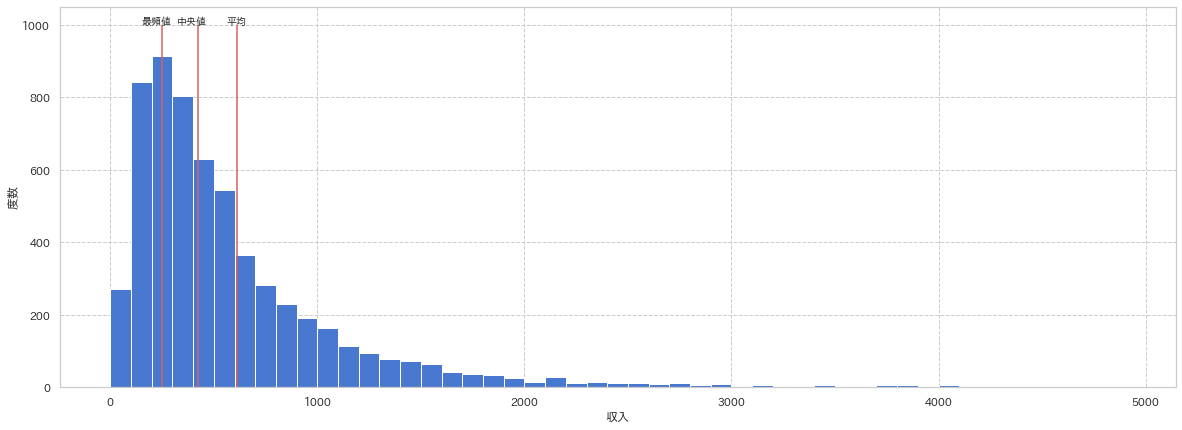

In [17]:
# 階級の幅の単位
class_interval_unit = 100

plt.figure(figsize=(20,7))
# bins = np.arange(0, 3000, class_interval_unit).tolist() + [4000, 5000]
bins = np.arange(0, 5000, class_interval_unit)
class_freq, class_interval, _ = plt.hist(income, bins=bins, density=False)

# for i in range(len(class_freq)):
#   if class_freq[i] != 0:
#     plt.text(class_interval[i+1]-100, class_freq[i], f"{class_freq[i]/n_data*100: .1f}%")

# 代表値の計算
mean_val = np.mean(income)
median_val = np.median(income)
mode_class_idx = np.argmax(class_freq)
mode_val = class_interval[mode_class_idx] + class_interval_unit/2

# 代表値の描画
max_freq_round = np.round(np.max(class_freq), -3)
plt.vlines(mean_val, 0, max_freq_round, color="r")
plt.text(mean_val-50, max_freq_round, "平均")
plt.vlines(median_val, 0, max_freq_round, color="r")
plt.text(median_val-100, max_freq_round, "中央値")
plt.vlines(mode_val, 0, max_freq_round, color="r")
plt.text(mode_val-100, max_freq_round, "最頻値")

plt.xlabel("収入")
plt.ylabel("度数")
print(max(income))


In [18]:
n_over_mean_val = np.sum([income > mean_val])
n_income = len(income)
n_over_mean_val, n_income, n_over_mean_val / n_income

(1949, 6000, 0.3248333333333333)

### 分位点

* 図１０ 四分位を計算するpythonコード

In [19]:
height_men_25 = np.percentile(height_men, 25)
height_men_75 = np.percentile(height_men, 75)
print(f"男性の身長の第1四分位点： {height_men_25:.3f}, 第3四分位点： {height_men_75:.3f}")

男性の身長の第1四分位点： 167.632, 第3四分位点： 175.085


♯平均偏差

* 図１１ ２つのグループの身長の分布

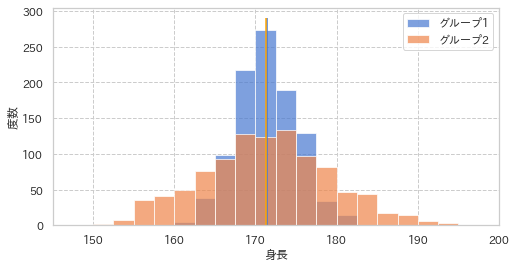

171.40608192001145 171.26935513517634


In [20]:
np.random.seed(71)
n_data = 1000
x1 = np.random.normal(loc=171.4, scale=3.8, size=n_data)
x2 = np.random.normal(loc=171.4, scale=7.8, size=n_data)

x1_mean = np.mean(x1)
x2_mean = np.mean(x2)

plt.figure(figsize=(8,4))
plt.hist(x1, bins=np.arange(140, 200, 2.5), alpha=0.7, label="グループ1")
plt.hist(x2, bins=np.arange(140, 200, 2.5), alpha=0.7, label="グループ2")

plt.vlines(x1_mean, 0, 290, "b")
plt.vlines(x2_mean, 0, 290, "orange")
plt.xlim(145, 200)
plt.ylabel("度数")
plt.xlabel("身長")
plt.legend(loc="best")
plt.show()

print(x1_mean, x2_mean)


### 平均偏差

In [21]:
# テストの点数データ
x = [96, 63, 85, 66, 91, 89, 77]
m = np.mean(x)
deviation_x = np.array(x) - m
deviation_x

array([ 15., -18.,   4., -15.,  10.,   8.,  -4.])

* 図１２ 偏差を可視化して理解する

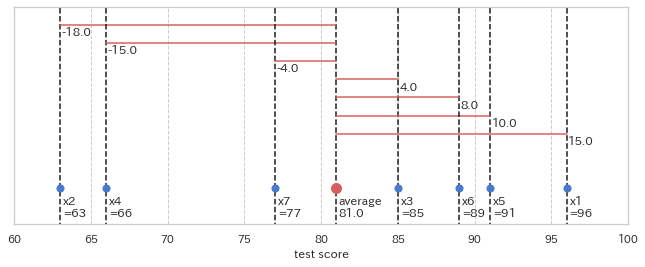

In [22]:
m = np.mean(x)
plt.figure(figsize=(11,4))
plt.scatter(x, np.zeros_like(x), s=50, zorder=100)
plt.scatter(m, [0], s=100, c="r", zorder=100)

for i in range(len(x)):
  plt.text(x[i]+0.2, -0.8, f"x{i+1}\n={x[i]}", size=12)

plt.text(m+0.1, -0.8, f"average\n{m}", size=12)
plt.plot([m, m], [-5,10], "k--", zorder=10)
for i, p, sd in zip(range(len(x)), [1.5, 4.5, 3, 4, 2, 2.5, 3.5], deviation_x):
  plt.plot([x[i], x[i]], [-5, 10], "k--", zorder=10)
  plt.plot([x[i], m], [p, p], "r", zorder=10)
  plt.text(x[i]+0.1, p-0.3, f"{sd}", size=12)

plt.yticks([])
plt.xlim(60, 100)
plt.ylim(-1, 5)
plt.xlabel("test score")
plt.show()



In [23]:
deviation_x_abs = np.abs(deviation_x)
deviation_x_abs, np.mean(deviation_x)

(array([15., 18.,  4., 15., 10.,  8.,  4.]), 0.0)

* 図１３ 偏差の絶対値をとった値を可視化

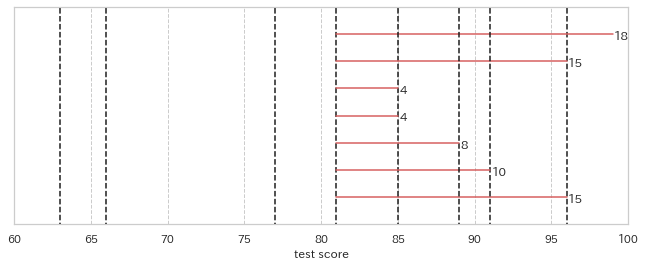

In [24]:
m = np.mean(x)
plt.figure(figsize=(11,4))

plt.plot([m, m], [-5, 10], "k--", zorder=10)
for i, p, sd in zip(range(len(x)), [1.5, 4.5, 3, 4, 2, 2.5, 3.5], deviation_x_abs):
  plt.plot([x[i], x[i]], [-5, 10], "k--", zorder=10)
  plt.plot([m+sd, m], [p, p], "r", zorder=10)
  plt.text(m+sd+0.1, p-0.1, f"{sd:.0f}", size=12)

plt.yticks([])
plt.xlim(60, 100)
plt.ylim(1, 5)
plt.xlabel("test score")
plt.show()

* 図１４ 平均偏差を計算するPythonコードと、実際の計算式

平均偏差 $ = \frac{1}{n} \sum_{i=1}^{n} | x_i - \bar{x} | $

In [25]:
# コード5:平均偏差を計算するpythonコード
def average_deviation(x):
  mean_val = np.mean(x)
  n_data = len(x)
  sum_val = 0
  for i in range(len(x)):
    sum_val += np.abs(x[i] - mean_val)
  return sum_val / n_data

In [26]:
average_deviation(x1)

2.9132362036922173

In [27]:
average_deviation(x2)

6.310475113543013

# 分散

In [28]:
from matplotlib.patches import Rectangle

In [29]:
deviation_x

array([ 15., -18.,   4., -15.,  10.,   8.,  -4.])

* 図１６ 偏差の２乗を可視化

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


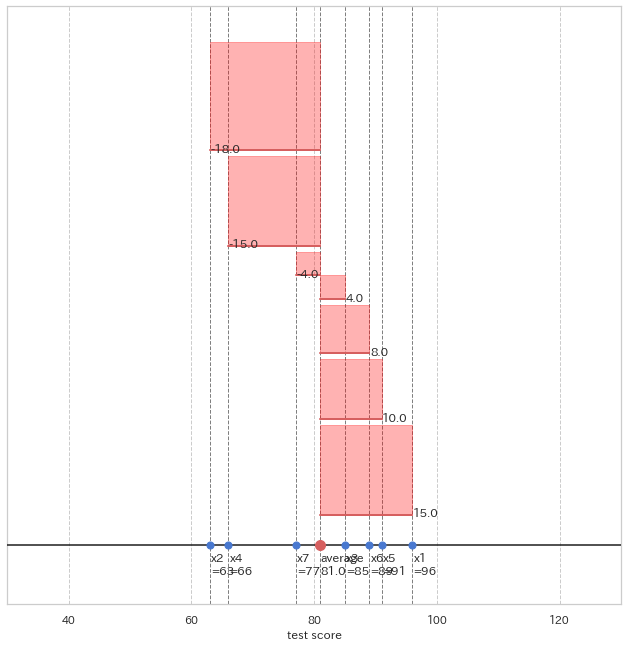

In [30]:
y_max_for_plot = 90

m = np.mean(x)
plt.figure(figsize=(11,11))
ax = plt.subplot(111)
plt.scatter(x, np.zeros_like(x), s=50, zorder=100)
plt.scatter(m, [0], s=100, c="r", zorder=100)

for i in range(len(x)):
  plt.text(x[i]+0.2, -5, f"x{i+1}\n={x[i]}", size=12)

plt.text(m+0.1, -5, f"average\n{m}", size=12, zorder=300)
plt.plot([0, 130], [0, 0], c="k", zorder=10)

plt.plot(
    [m, m], [-10, y_max_for_plot], "gray", linewidth=1,
    linestyle="--", lw=0.5, zorder=-10
)
for i, p, sd in zip(range(len(x)), [5, 66, 41, 50, 21, 32, 45], deviation_x):
  abs_sd = np.abs(sd)
  plt.plot([x[i], x[i]], [-10, y_max_for_plot], "gray", linewidth=1, linestyle="--", zorder=-10)
  plt.plot([x[i], m], [p, p], "r", linewidth=2, zorder=200)
  plt.text(x[i]+0.1, p-0.3, f"{sd}", size=12, zorder=300)
  r = Rectangle(xy=(x[i], p), width=-sd, height=abs_sd, fill=True, color="red", alpha=0.3)
  ax.add_patch(r)

plt.yticks([])
plt.xlim(30,130)
plt.ylim(-10, y_max_for_plot)
plt.xlabel("test score")
plt.show()

In [31]:
np.mean(deviation_x ** 2)

138.57142857142858

* 図１５ 分散を計算するPythonコードと、実際の計算式

分散 $ = \frac{1}{n} \sum_{i=1}^{n} ( x_i - \bar{x} )^2 $

In [32]:
# コード６：分散を計算するpythonコード
def variance(x):
  mean_val = np.mean(x)
  n_data = len(x)
  sum_val = 0
  for i in range(len(x)):
    sum_val += (x[i] - mean_val) ** 2
  return sum_val / n_data

In [33]:
def standard_deviation(x):
  return np.sqrt(variance(x))

In [34]:
variance(x1), variance(x2)

(13.369184608430686, 62.79554529772076)

In [35]:
standard_deviation(x1), standard_deviation(x2)

(3.656389559173186, 7.924364031120779)